# Welcome to the world of Machine Learning

In [1]:
import numpy as np
a = np.array([[1, 2, 3, 4], [ 5, 6, 7, 8], [9, 10, 11, 12]])
print(a[0])


[1 2 3 4]


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
import pandas as pd


In [26]:
x, y = datasets.load_diabetes(return_X_y=True)
print(x.shape)
print(x[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


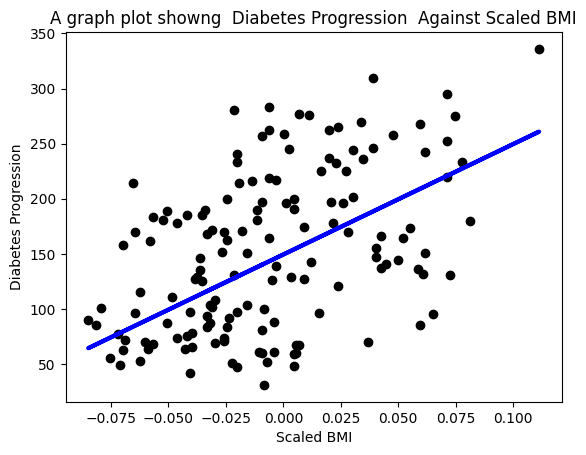

In [27]:
x = x[:, 2]
x = x.reshape((-1,1))
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred =model.predict(x_test)
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMI')
plt.ylabel('Diabetes Progression')
plt.title('A graph plot showng  Diabetes Progression  Against Scaled BMI')  
plt.show()